In [25]:
!date
%matplotlib inline

Wed Mar 30 11:07:24 MDT 2016


In [26]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform, Matplot
import pymc
import numpy as np
import spacepy.plot as spp # for the style

In [44]:
rate = DiscreteUniform('rate', lower=0, upper=1e7)

data = [4]
counts = Poisson('counts', mu=rate, value=data, observed=True)

M = pymc.MCMC([counts, rate])

@pymc.observed
def y(mu=rate, value=data):
    return pymc.Poisson('counts', mu=data, value=data, observed=True)

M = pymc.MCMC([counts, y])
M.sample(10000)
M.summary()
Matplot.plot(M)
M.stats()

 [-----------------100%-----------------] 10000 of 10000 complete in 0.2 sec

{}

In [37]:
M.sample(10000)
M.summary()

 [-----------------100%-----------------] 10000 of 10000 complete in 0.8 sec
rate:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	4971544.66       2865944.886      25549.969  [   25816.  9464628.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	249178.0         2499067.0       4946374.0      7450798.0     9720445.0
	

counts:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	4971535.356      2865948.542      25547.027  [   25045.  9463605.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	249570.0         2500158.0       4947121.0      7449629.0     9719149.0
	


 [-----------------100%-----------------] 1000 of 1000 complete in 6.7 secPlotting rate


/Users/balarsen/miniconda3/envs/python3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:1800: RuntimeWarning: invalid value encountered in true_divide
  c /= np.sqrt(np.dot(x, x) * np.dot(y, y))


Plotting counts_0


{'counts': {'95% HPD interval': array([-302.96990452,   97.36320399]),
  'mc error': 11.661494077773673,
  'mean': -83.195367900940099,
  'n': 1000,
  'quantiles': {2.5: -307.34253150610118,
   25: -175.10085503532304,
   50: -59.822113017354624,
   75: 15.08674187314989,
   97.5: 96.732943171425177},
  'standard deviation': 117.95626018876726},
 'rate': {'95% HPD interval': array([ 4.,  4.]),
  'mc error': 0.0,
  'mean': 4.0,
  'n': 1000,
  'quantiles': {2.5: 4.0, 25: 4.0, 50: 4.0, 75: 4.0, 97.5: 4.0},
  'standard deviation': 0.0}}

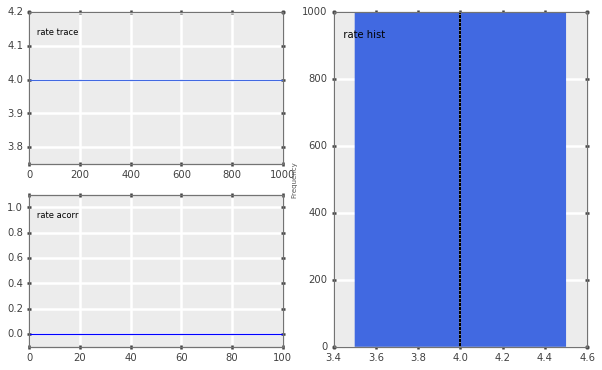

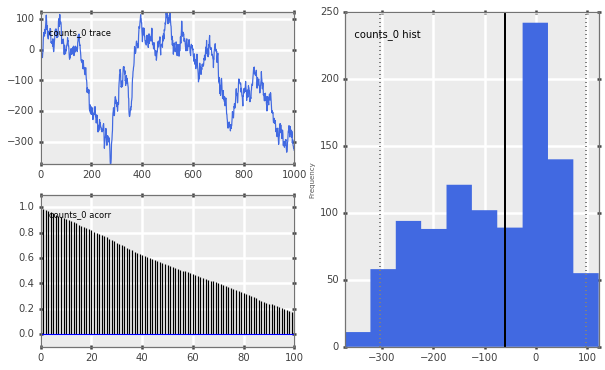

In [28]:
M.sample(1000)
Matplot.plot(M)
M.stats()
